# Tensorflow tutorial with Keras

# Example 1: Build a 2-layer perceptron with fixed weights

- Initialize a 2-layer network with sigmoid activation functions. 
- Set weights and biases by hand with values that solves the XOR problem.
- Visualize the network and test classification.

## Activity rule and cost function
Activity: 
$$
f(h)={1\over 1+e^{-h}}\ , \,\,h^\mu=\sum_{i=1}^Nw_ix_i^\mu+b
$$

Log-likelihood function: 
$$
G(t^\mu|x^\mu_i,w_i)=-\sum_{\mu=1}^p\left[t^\mu\ln f(h^\mu)+(1-t^\mu)\ln(1- f(h^\mu))\right]
$$

towardsdatascience website: highly recommended.

In [8]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
from tensorflow.keras.regularizers import l2

# Example 1 

XOR problem with a 2-layer perceptron

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 2)                 6         
                                                                 
 dense_11 (Dense)            (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
None
show trainable parameters
[<tf.Variable 'dense_10/kernel:0' shape=(2, 2) dtype=float32, numpy=
array([[1., 1.],
       [1., 1.]], dtype=float32)>, <tf.Variable 'dense_10/bias:0' shape=(2,) dtype=float32, numpy=array([ 1., -1.], dtype=float32)>, <tf.Variable 'dense_11/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[ 1.],
       [-1.]], dtype=float32)>, <tf.Variable 'dense_11/bias:0' shape=(1,) dtype=float32, numpy=array([-0.25], dtype=float32)

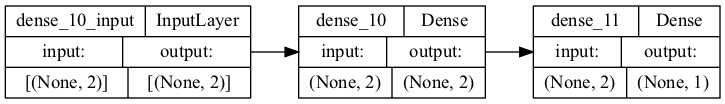

In [10]:
n_features=2 # dimension of input space

# define the model
model=Sequential()
#hidden layer
model.add(Dense(2,activation='sigmoid',kernel_initializer='he_normal',input_shape=(n_features,)))
#output layer
model.add(Dense(1,activation='sigmoid'))
# set the weights by hand
w1=np.ones((n_features,2)) # rows=input neurons, cols=hidden units
b1=np.zeros((2,)) # bias for the hidden layer neurons
w2=np.zeros((2,1)) # rows=hidden layer, cols=output
b2=np.zeros((1,)) # bias for the output
# assign the values of the weights
b1[0]=1; b1[1]=-1
w2[0]=1; w2[1]=-1
b2[0]=-0.25

# set the weights
model.set_weights([w1,b1,w2,b2])

# compile the model
model.compile(loss='binary_crossentropy',metrics=['accuracy'])

print(model.summary())
print('show trainable parameters')
print(model.trainable_variables)

weights=model.get_weights()
print('print weights')
print(weights)

# check it solves the XOR problem
x1=np.array([[-1,-1],[-1,+1],[+1,-1],[1,1]])
y1=np.array([0,1,1,0])
loss,acc=model.evaluate(x1,y1,verbose=1)

print('test accuracy: %.3f' % acc)

plot_model(model,show_shapes=True,rankdir='LR',to_file='model.png')

In [11]:
def generate_patterns(spread,N=2,p1=100,p2=100,option='separable',plot=False):

    # generate targets
    t=np.ones((p1+p2))# targets
    t[p1:]=0 # t2=0 targets
    x=np.zeros((p1+p2,N))
    
    # generate inputs
    if option=='separable':
        # separable targets
        x[0:p1,0:N]=1+spread*np.random.randn(N*p1).reshape(p1,N)
        x[p1:p1+p2,0:N]=-1+spread*np.random.randn(N*p2).reshape(p2,N)
    elif option=='nonseparable':
        x[0:p1,0:N]=1+spread*np.random.randn(N*p1).reshape(p1,N)
        x[0:int(p1/2),0:N]=-x[0:int(p1/2),0:N]
        x[p1:p1+p2,0:N]=-1+spread*np.random.randn(N*p2).reshape(p2,N)
        x[int(p1+p2/2):(p1+p2),0]=-x[int(p1+p2/2):(p1+p2),0]; x[p1:int(p1+p2/2),1]=-x[p1:int(p1+p2/2),1]
    elif option=='weird':
        x[0:p1,0:N]=1+spread*np.random.randn(N*p1).reshape(p1,N)
        x[0:int(p1/2),0:N]=-x[0:int(p1/2),0:N]+1.5
        x[p1:p1+p2,0:N]=-1+spread*np.random.randn(N*p2).reshape(p2,N)
        x[int(p1+p2/2):(p1+p2),0]=-x[int(p1+p2/2):(p1+p2),0]; x[p1:int(p1+p2/2),1]=-x[p1:int(p1+p2/2),1]+1
        t=np.ones((p1+p2))# targets
        t[0:int(p1/2)]=0; t[p1:int(p1+p2/2)]=0

    # make a figure
    if plot == True:
        fig,ax=plt.subplots()
        plt.title('Linearly {} Patterns with Spread of {}'.format(option,spread))
        size=100
        # scatterplot
        ax.scatter(x[t==1,0],x[t==1,1],s=size,color='red',alpha=0.25,label='+1')
        ax.scatter(x[t==0,0],x[t==0,1],s=size,color='blue',alpha=0.25,label='0')
        ax.set_xlabel("x1"); ax.set_ylabel("x2")
        ax.legend(loc='lower right')
        ax.axis('equal')  
    return x,t

# Example 2: Train a single layer perceptron

Workflow:
- Generate input patterns. 
- Split them into training and test set. 
- Define model: Initialize a 1-layer network (perceptron) with sigmoid activation functions. 
- Compile the model: Set optimization, loss function, and metrics for training.
- Train network using SGD and adam.
- Test network performance.
- Visualize the network training history.

Plot training history: accuracy and loss on training and test sets 

(1340, 2) (660, 2) (1340,) (660,)


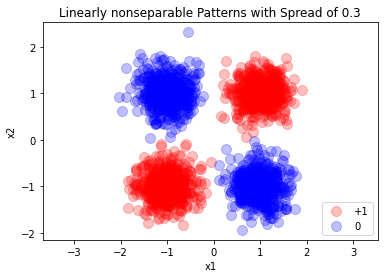

In [29]:
# generate patterns
X,y=generate_patterns(spread=0.3,N=2,p1=1000,p2=1000,option='nonseparable',plot=True)
# split into training and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
# dimensions of input features
n_patterns,n_features=X.shape

In [30]:


# define model
model=Sequential()
model.add(Dense(1,activation='sigmoid',kernel_initializer='he_normal',input_shape=(n_features,)))

# 'he_normal" draws weights from a gaussian with mean zero and standard deviation sqrt(2)/fan_in, where 
# fan_in is the number of input units
# kernel_regularizer=l2(alpha) is the weight decay with quadratic loss function with weight alpha
# add weight decay
# docs: https://machinelearningmastery.com/how-to-reduce-overfitting-in-deep-learning-with-weight-regularization/

# choose optimizer


# compile model

# model.compile(optimizer='SGD',loss='binary_crossentropy',metrics=['accuracy'])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
print(model.summary())

# fit the model
# history=model.fit(X_train,y_train,epochs=10,batch_size=32,verbose=1)
# early stopping

# define the early stopping with a callback
X_train0,X_val,y_train0,y_val=train_test_split(X_train,y_train,test_size=0.33)
cb=tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',mode='max',patience=10)
# evaluate the model
history=model.fit(X_train0,y_train0,epochs=1000,validation_data=(X_val,y_val),batch_size=32,callbacks=[cb],verbose=1)


print('test model')
print(model.trainable_variables)

loss,acc=model.evaluate(X_test,y_test,verbose=1)
print('test accuracy: %.3f' % acc)


Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/1000
29/29 [==============================] - 1s 12ms/step - loss: 0.7100 - accuracy: 0.5117 - val_loss: 0.7133 - val_accuracy: 0.4989
Epoch 2/1000
29/29 [==============================] - 0s 8ms/step - loss: 0.7076 - accuracy: 0.5128 - val_loss: 0.7111 - val_accuracy: 0.4989
Epoch 3/1000
29/29 [==============================] - 0s 8ms/step - loss: 0.7059 - accuracy: 0.5162 - val_loss: 0.7095 - val_accuracy: 0.5011
Epoch 4/1000
29/29 [==============================] - 0s 7ms/step - loss: 0.7046 - accuracy: 0.5217 - val_loss: 0.7084 - val_accuracy: 0.5056
Epoch 5/1000


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


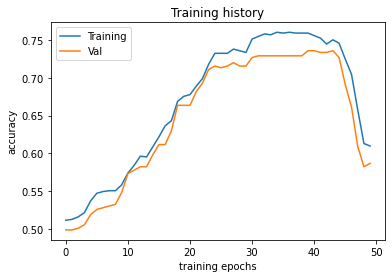

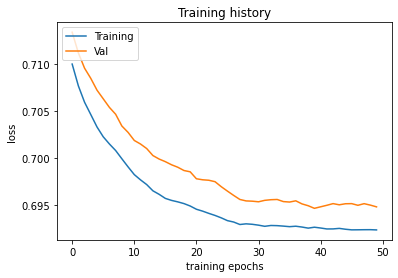

In [31]:
print(history.history.keys())
# plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training history')
plt.xlabel('training epochs')
plt.ylabel('accuracy')
plt.legend(['Training','Val'],loc='upper left')
plt.show()

# plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training history')
plt.xlabel('training epochs')
plt.ylabel('loss')
plt.legend(['Training','Val'],loc='upper left')
plt.show()

# Example 3: Train a two-layer perceptron

Workflow:
- Generate input patterns. 
- Split them into training and test set. 
- Define model: Initialize a 2-layer network with sigmoid activation functions. 
- Compile the model: Set optimization, loss function, and metrics for training.
- Train network using SGD and adam.
- Test network performance.
- Visualize the network training history.

(1340, 2) (660, 2) (1340,) (660,)


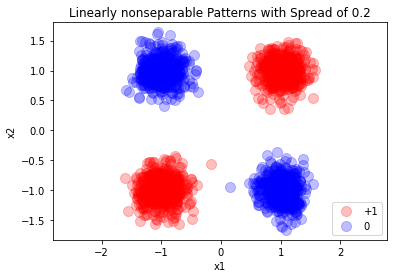

In [32]:
# generate patterns
X,y=generate_patterns(spread=0.2,N=2,p1=1000,p2=1000,option='nonseparable',plot=True)
# split into training and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
# dimensions of input features
n_patterns,n_features=X.shape

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 10)                30        
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_51 (Dense)            (None, 1)                 11        
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/1000
29/29 [==============================] - 1s 17ms/step - loss: 4.3285 - accuracy: 0.5619 - val_loss: 4.1452 - val_accuracy: 0.7088
Epoch 2/1000
29/29 [==============================] - 0s 9ms/step - loss: 4.1808 - accuracy: 0.5530 - val_loss: 3.9841 - val_accuracy: 0.7291
Epoch 3/1000
29/29 [===========

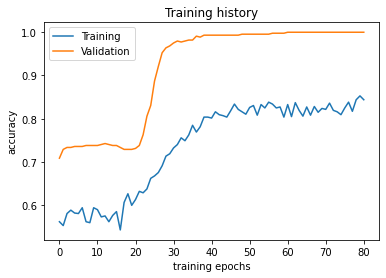

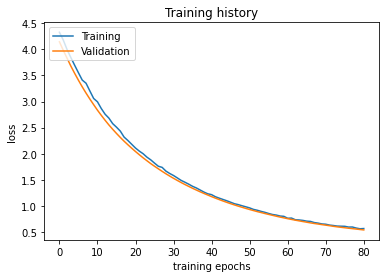

In [46]:
# define the model
alpha=0.1
p_dropout=0.5
model=Sequential()
model.add(Dense(10,activation='relu',kernel_regularizer=l2(alpha),kernel_initializer='he_normal',input_shape=(n_features,)))
model.add(tf.keras.layers.Dropout(p_dropout))
model.add(Dense(1,activation='sigmoid',kernel_initializer='he_normal'))

# compile
# model.compile(optimizer='SGD',loss='binary_crossentropy',metrics=['accuracy'])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
print(model.summary())

# fit the model
# define the early stopping with a callback
X_train0,X_val,y_train0,y_val=train_test_split(X_train,y_train,test_size=0.33)
cb=tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',mode='max',patience=20)
# evaluate the model
history=model.fit(X_train0,y_train0,epochs=1000,validation_data=(X_val,y_val),batch_size=32,callbacks=[cb],verbose=1)



# evaluate the model
print('test model')
print(model.trainable_variables)
loss,acc=model.evaluate(X_test,y_test,verbose=1)
print('test accuracy: %.3f' % acc)

# plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training history')
plt.ylabel('accuracy')
plt.xlabel('training epochs')
plt.legend(['Training','Validation'],loc='upper left')
plt.show()

# plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training history')
plt.ylabel('loss')
plt.xlabel('training epochs')
plt.legend(['Training','Validation'],loc='upper left')
plt.show()